# GreekStockPortfolio



### 2. Exploratory Data Analysis & Visualization

---

### Prices

In [ ]:
def explore_prices(prices):
    """
    Performs an exploratory analysis on a DataFrame containing stock prices.

    This function prints basic information about the DataFrame, calculates and displays descriptive statistics,
    and generates plots for both raw and normalized stock prices.

    Parameters:
    prices (pd.DataFrame): A DataFrame containing stock prices where columns represent different stocks and
                           the index represents dates.

    Returns:
    None: The function outputs information directly to the console and displays plots but does not return any value.
    """

    # Display the first few rows of the data
    print(prices.head())

    # Print the number of missing values in each column
    print('\n', prices.isnull().sum())

    # Print a summary of the DataFrame
    print('\n', prices.info(), '\n')

    # Calculate and display descriptive statistics including variance, skewness, and kurtosis
    print('Summary Statistics\n')
    stats = prices.describe()
    stats.loc['var'] = prices.var()       # Add variance to the statistics
    stats.loc['skew'] = prices.skew()     # Add skewness to the statistics
    stats.loc['kurt'] = prices.kurtosis() # Add kurtosis to the statistics
    print(stats)

    # Plot raw stock prices
    fig = px.line(title='Stock Prices')
    for stock in prices.columns:
        fig.add_scatter(x=prices.index, y=prices[stock], name=stock)
    fig.show()

    # Normalize prices by dividing by the first available price for each stock
    normalized_prices = prices.copy()
    for stock in normalized_prices.columns:
        normalized_prices[stock] = normalized_prices[stock] / normalized_prices[stock].iloc[0]

    # Plot normalized stock prices
    fig = px.line(title='Normalized Stock Prices')
    for stock in normalized_prices.columns:
        fig.add_scatter(x=normalized_prices.index, y=normalized_prices[stock], name=stock)
    fig.show()


In [ ]:
explore_prices(prices)

Ticker      ADMIE.AT   AEGN.AT  ALPHA.AT   AVAX.AT  BELA.AT  CENER.AT  \
Date                                                                    
2018-08-06     1.736  7.496605  1.836086  0.303981    13.68     1.270   
2018-08-07     1.746  7.541984  1.826161  0.305029    13.62     1.270   
2018-08-08     1.744  7.578287  1.818221  0.304330    13.60     1.270   
2018-08-09     1.742  7.541984  1.796386  0.294198    13.56     1.274   
2018-08-10     1.684  7.433075  1.767605  0.294897    13.28     1.268   

Ticker         EEE.AT   ELHA.AT  ELLAKTOR.AT  ELPE.AT  ...  PLAT.AT  \
Date                                                   ...            
2018-08-06  30.780001  1.351765     1.628261     7.09  ...     2.23   
2018-08-07  30.840000  1.342959     1.618914     7.15  ...     2.18   
2018-08-08  30.559999  1.312137     1.620783     7.15  ...     2.17   
2018-08-09  30.559999  1.307734     1.654432     7.15  ...     2.22   
2018-08-10  29.780001  1.263702     1.643216     7.05  ...    

### Returns

In [ ]:
def explore_returns(returns):
    """
    Calculates and visualizes the correlation matrix of stock returns as a heatmap.

    This function computes the correlation matrix for the provided stock returns DataFrame and displays it
    as a heatmap. This visualization helps in understanding the relationships between different stocks.

    Parameters:
    returns (pd.DataFrame): A DataFrame containing daily logarithmic returns of stocks, with columns representing
                            different stocks and the index representing dates.

    Returns:
    None: The function directly displays a heatmap of the correlation matrix but does not return any value.
    """
    # Display the first few rows of the returns DataFrame
    print(returns.head())

    # Print the count of missing values for each column
    print('\n', returns.isnull().sum())

    # Show the DataFrame's structure and data types
    print('\n', returns.info(), '\n')

    # Calculate descriptive statistics for the returns
    print('Summary Statistics\n')
    stats = returns.describe()
    stats.loc['var'] = returns.var().tolist()  # Add variance to the statistics
    stats.loc['skew'] = returns.skew().tolist()  # Add skewness to the statistics
    stats.loc['kurt'] = returns.kurtosis().tolist()  # Add kurtosis to the statistics
    print(stats)

    # Plot histograms of the returns to visualize their distribution
    returns.hist(bins=40, figsize=(40, 30))
    plt.suptitle('Histograms of Stock Returns', fontsize=30)
    plt.show()

    # Plot the time series of stock returns using Plotly for interactive visualization
    fig = px.line(title='Mid-cap and Large-cap Stock Returns')
    for i in returns.columns[1:]:
        fig.add_scatter(x=returns.index, y=returns[i], name=i)  # Add a new Scatter trace for each stock

    fig.show()

    return


Ticker      ADMIE.AT   AEGN.AT  ALPHA.AT   AVAX.AT   BELA.AT  CENER.AT  \
Date                                                                     
2018-08-07  0.005744  0.006035 -0.005420  0.003442 -0.004396  0.000000   
2018-08-08 -0.001146  0.004802 -0.004357 -0.002294 -0.001469  0.000000   
2018-08-09 -0.001147 -0.004802 -0.012082 -0.033860 -0.002946  0.003145   
2018-08-10 -0.033862 -0.014546 -0.016151  0.002373 -0.020865 -0.004721   
2018-08-13 -0.013150 -0.013522 -0.077613 -0.011922 -0.013647 -0.038590   

Ticker        EEE.AT   ELHA.AT  ELLAKTOR.AT   ELPE.AT  ...   PLAT.AT  \
Date                                                   ...             
2018-08-07  0.001947 -0.006536    -0.005757  0.008427  ... -0.022677   
2018-08-08 -0.009121 -0.023218     0.001154  0.000000  ... -0.004598   
2018-08-09  0.000000 -0.003361     0.020548  0.000000  ...  0.022780   
2018-08-10 -0.025855 -0.034250    -0.006802 -0.014085  ... -0.009050   
2018-08-13 -0.024474  0.003478    -0.016056 -0.02

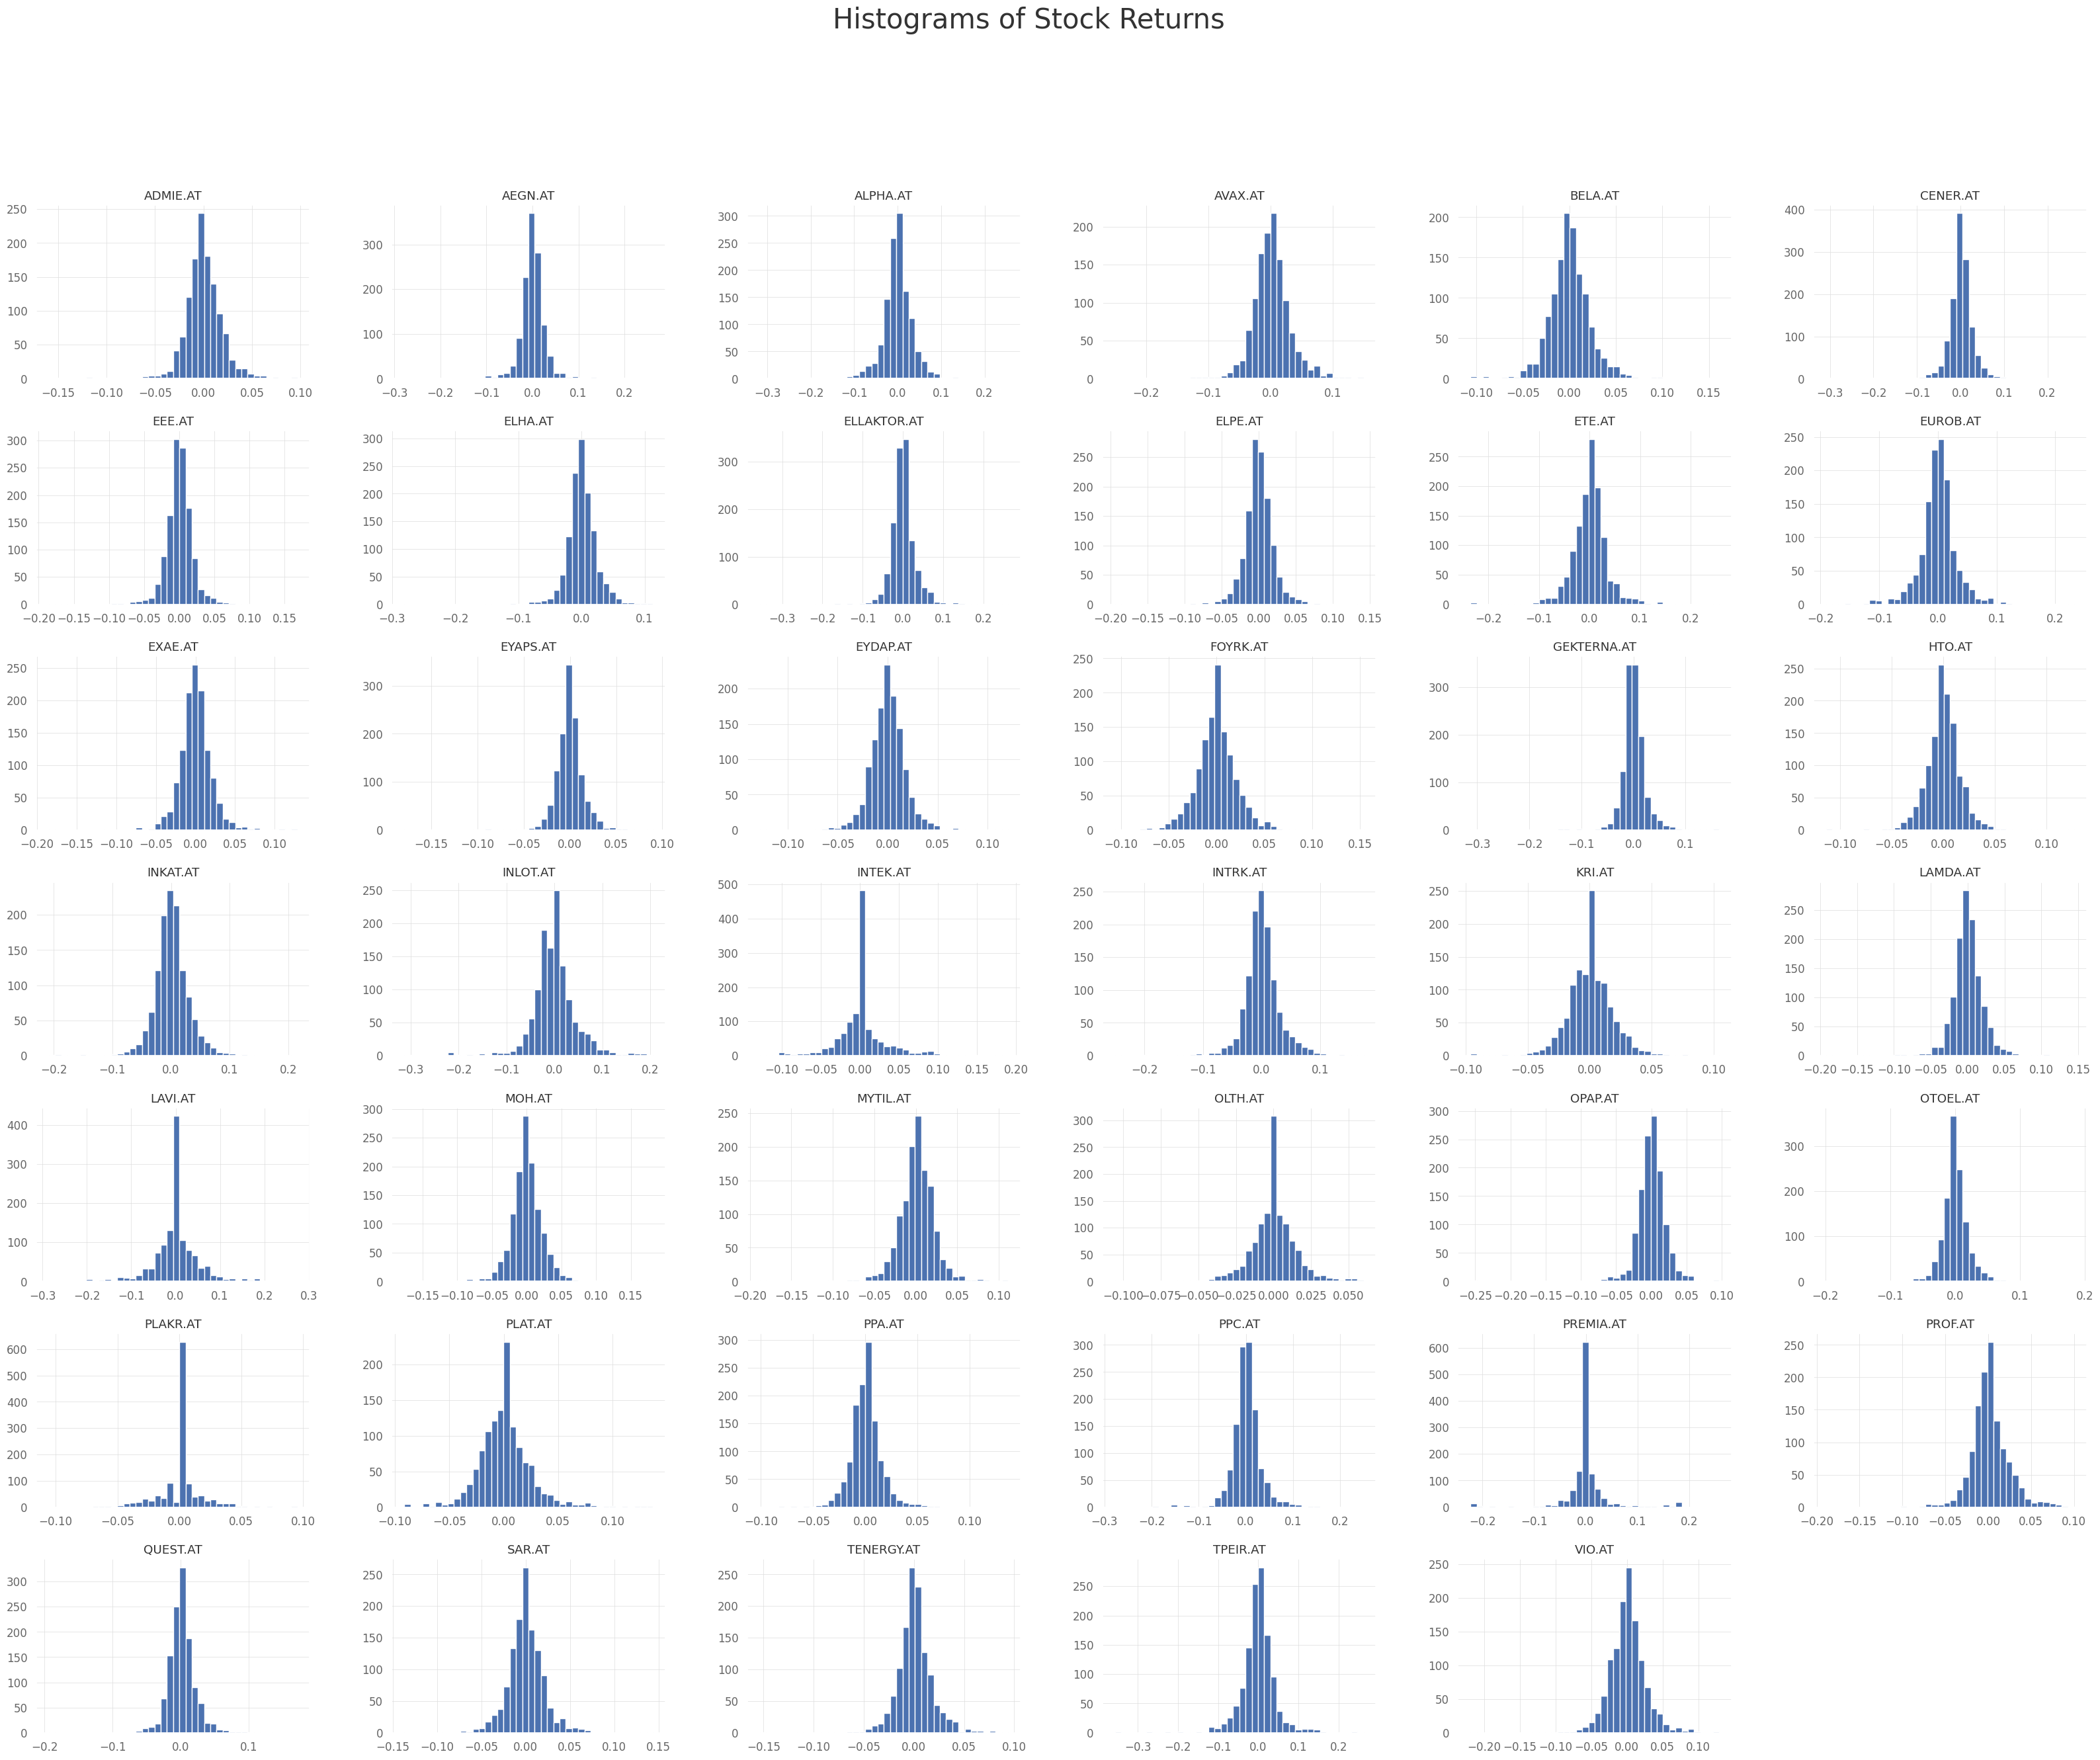

In [ ]:
explore_returns(returns)

### Correlation

In [ ]:
def cor_heat(returns):
    """
    This function calculates the correlation matrix of the given stock returns and visualizes it
    as a heatmap, making it easier to see the relationships between different stocks.

    Parameters:
    returns (DataFrame): A DataFrame containing the daily returns of stocks.
    """
    # Calculate the correlation matrix of the returns
    r_cor = returns.corr()

    # Create and display the heatmap
    plt.figure(figsize=(45, 25))
    sns.heatmap(r_cor, annot=True, cmap='coolwarm', center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Heatmap', fontsize=30)
    plt.show()


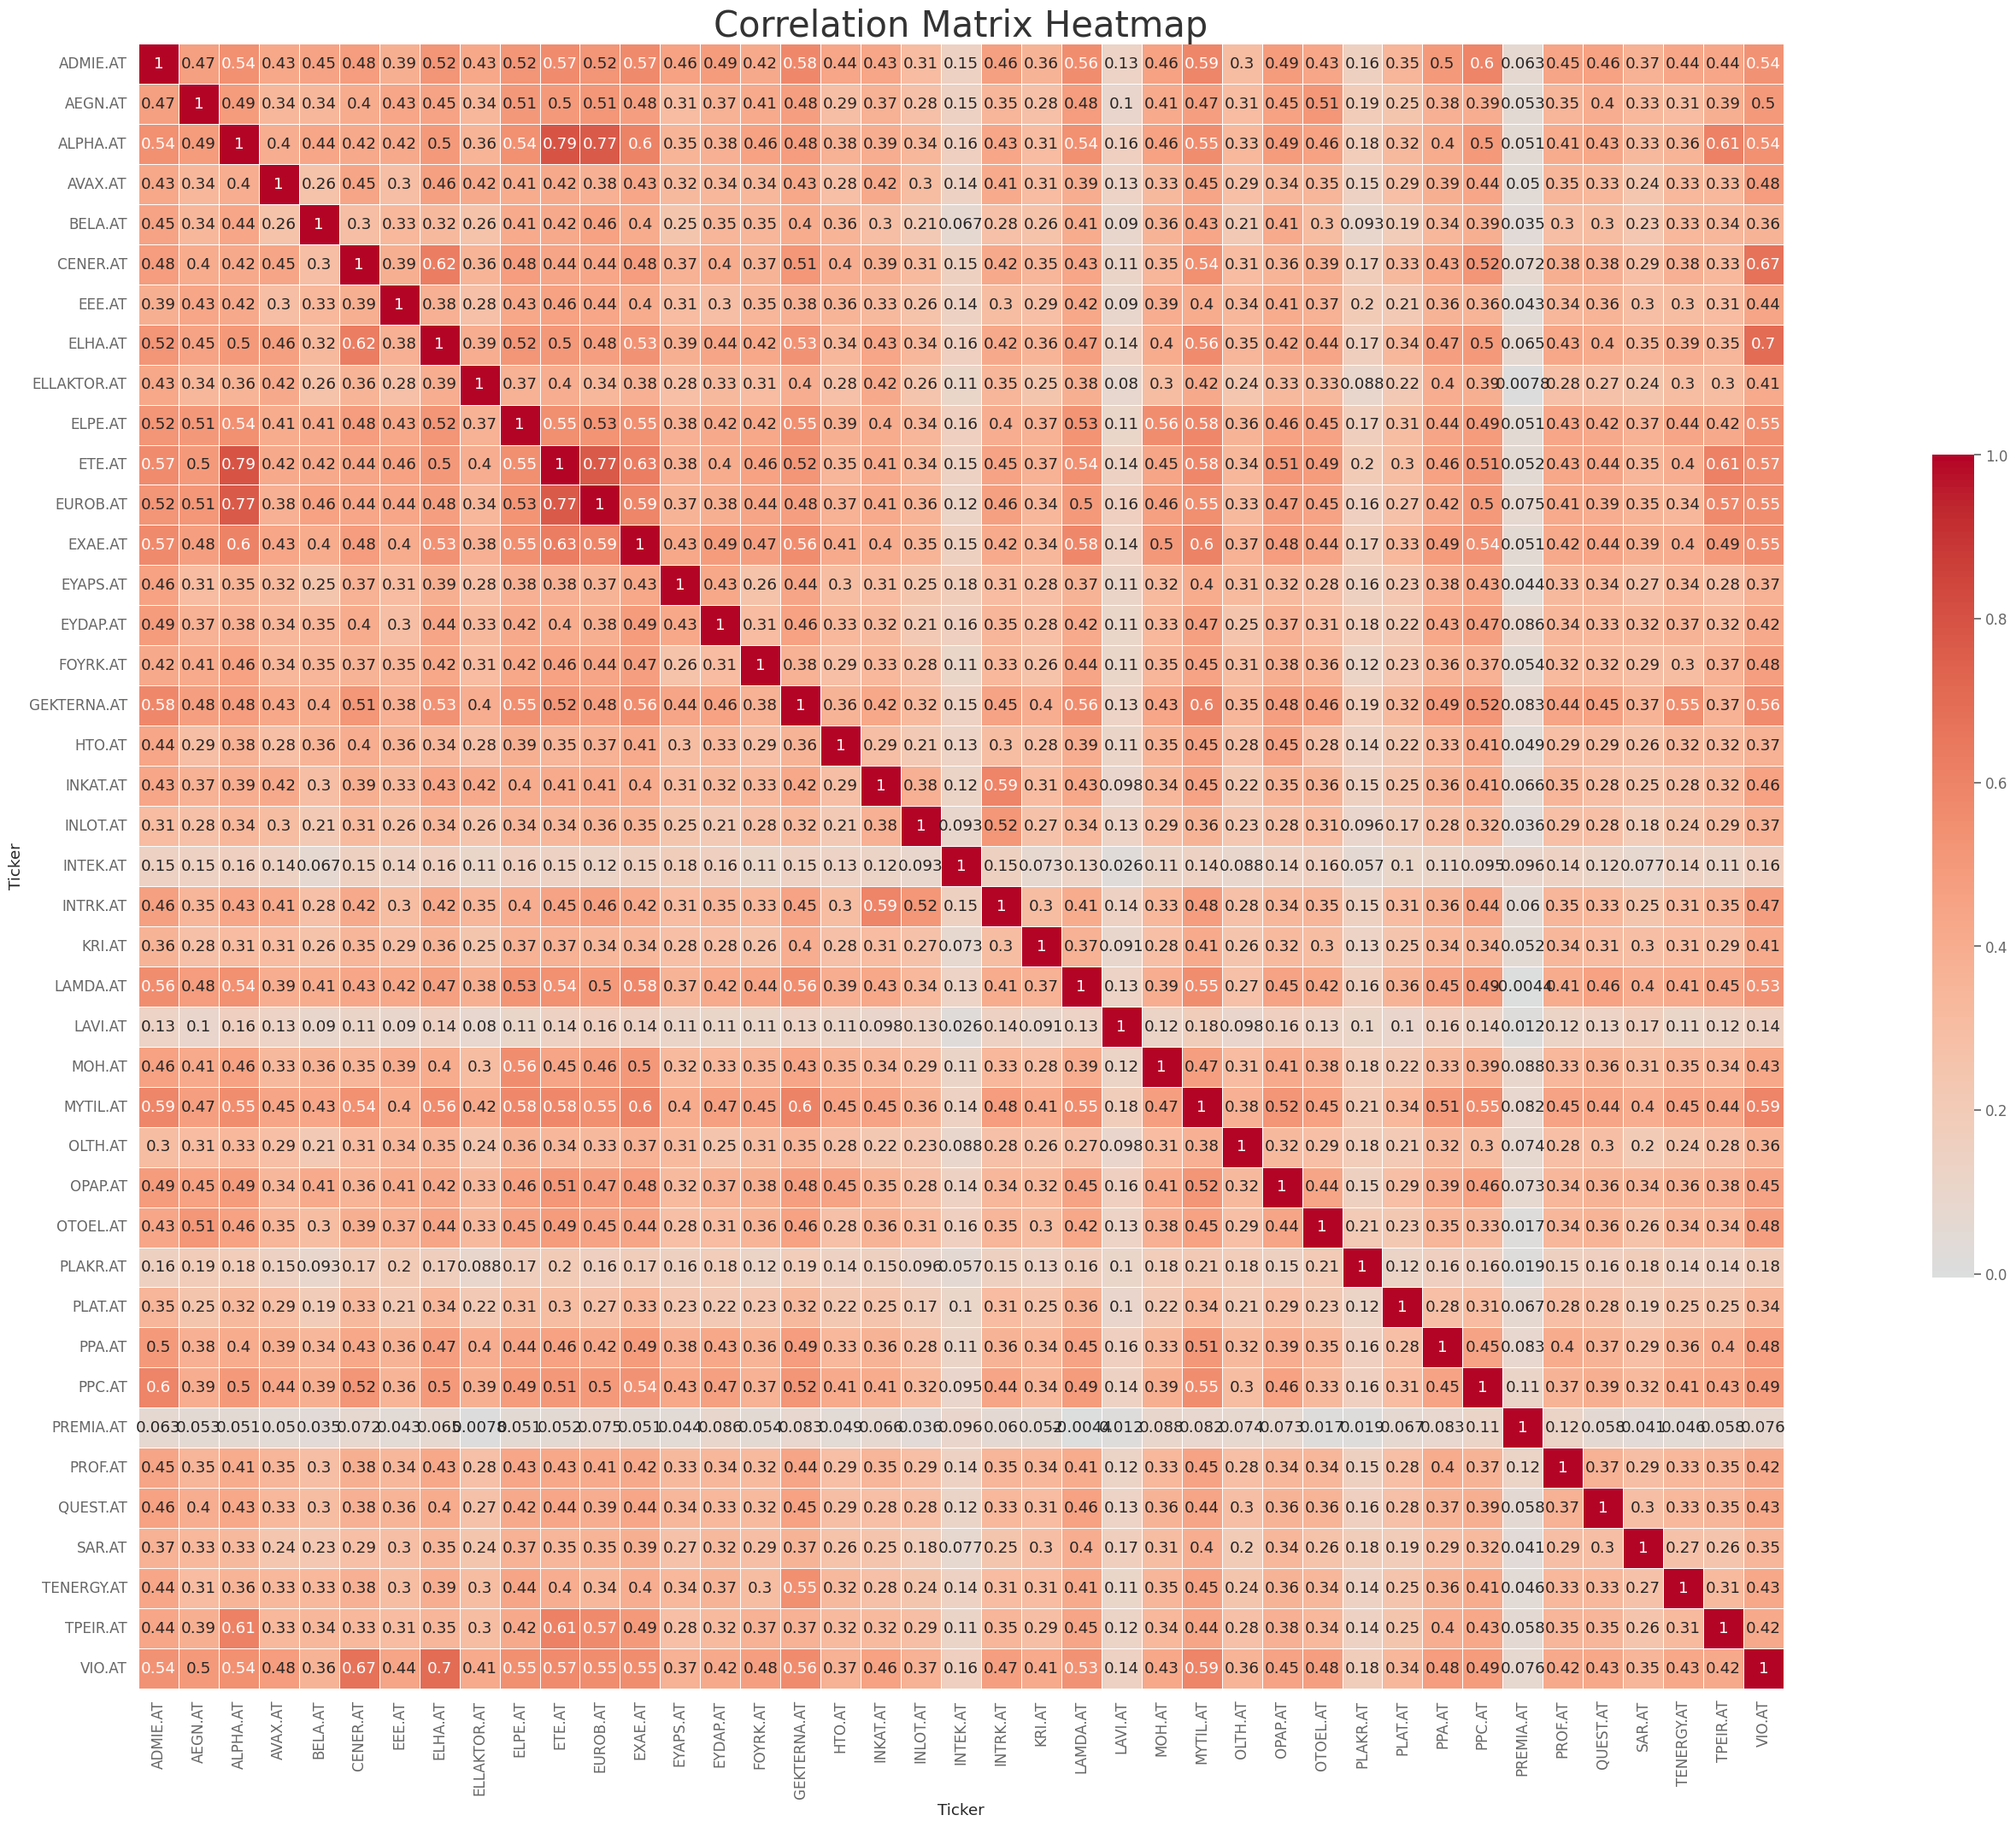

In [ ]:
cor_heat(returns)